# Project 1 – Henry

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import seaborn as sns

In [2]:
aug_sep = pd.read_csv("Simmer_AugSep19.csv", low_memory=False)
oct_nov = pd.read_csv("Simmer_OctNov19.csv", low_memory=False)
dec_jan = pd.read_csv("Simmer_DecJan19.csv", low_memory=False)
feb_mar = pd.read_csv("Simmer_FebMar20.csv", low_memory=False)
people = pd.read_csv("People_Sample.csv", low_memory=False)

## Cleaned_Dataset_with_ID Starts Here ##

In [39]:
with_id = pd.read_csv("Cleaned_Dataset_With_ID.csv")
with_id = with_id[with_id['ae_session_length'] != -1.0]
with_id.head()

,Unnamed: 0,name_x,distinct_id,time,ae_session_length,city,region,mp_country_code,locationSetting,notificationSettings,...,ae_first_app_open_date,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,session_id
4,84495,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:49:02,30.1,Palo Alto,California,US,1,1,...,NaN,NaN,NaN,US,1,0,0,0,0,1
19,84456,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:50:51,65.8,Palo Alto,California,US,1,0,...,NaN,NaN,NaN,US,1,0,0,0,0,2
21,84458,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:51:52,59.9,Palo Alto,California,US,1,1,...,NaN,NaN,NaN,US,1,0,0,0,0,3
24,84817,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 14:38:30,72.3,Hayward,California,US,1,1,...,NaN,NaN,NaN,US,1,0,0,0,0,4
36,84633,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 15:05:10,151.9,San Jose,California,US,1,1,...,NaN,NaN,NaN,US,1,0,0,0,0,5


In [40]:
groupby_id = with_id.groupby(['distinct_id']).agg(np.mean)
groupby_id.head()

,Unnamed: 0,ae_session_length,locationSetting,notificationSettings,commentAdded,commentLength,ae_total_app_session_length,ae_total_app_sessions,average_session_time,US,Facebook,Foodie,Google,Unknown,session_id
distinct_id,,,,,,,,,,,,,,,
000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,82472.363636,82.854545,1.0,0.545455,2.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,6.0
001210DC-54C8-43AD-B295-148F47818391,48113.900000,47.940000,1.0,0.700000,2.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,16.5
0025A8A4-2590-4ECA-8CE8-419D710AE46F,22757.625000,177.325000,1.0,0.500000,2.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,25.5
004C9C76-A530-422A-BA1B-667CDA12A08D,16556.750000,27.175000,1.0,0.250000,2.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,31.5
005144D7-BD3F-405B-9621-5FACA6B1AC04,80742.500000,20.950000,1.0,0.000000,2.0,0.0,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,34.5


In [42]:
added_metric_2 = with_id.merge(groupby_id['ae_session_length'], on = 'distinct_id')
added_metric_2 = added_metric_2.rename(columns={'ae_session_length_y': 'metric_2'})
added_metric_2.head(100)

,Unnamed: 0,name_x,distinct_id,time,ae_session_length_x,city,region,mp_country_code,locationSetting,notificationSettings,...,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,session_id,metric_2
0,84495,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:49:02,30.1,Palo Alto,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,1,82.854545
1,84456,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:50:51,65.8,Palo Alto,California,US,1,0,...,NaN,NaN,US,1,0,0,0,0,2,82.854545
2,84458,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 13:51:52,59.9,Palo Alto,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,3,82.854545
3,84817,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 14:38:30,72.3,Hayward,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,4,82.854545
4,84633,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 15:05:10,151.9,San Jose,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,5,82.854545
5,84654,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 15:08:11,115.8,San Jose,California,US,1,0,...,NaN,NaN,US,1,0,0,0,0,6,82.854545
6,84657,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-23 15:08:59,47.3,San Jose,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,7,82.854545
7,78737,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-24 09:50:32,42.9,Los Altos,California,US,1,1,...,NaN,NaN,US,1,0,0,0,0,8,82.854545
8,78755,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-24 09:51:21,37.9,Los Altos,California,US,1,0,...,NaN,NaN,US,1,0,0,0,0,9,82.854545
9,78784,$ae_session,000BA5B1-DBEF-414E-ACEC-1A2FCC2053DD,2019-08-24 09:53:39,101.1,Los Altos,California,US,1,0,...,NaN,NaN,US,1,0,0,0,0,10,82.854545


In [50]:
# Double check:

added_metric_2[added_metric_2['distinct_id'] == '001210DC-54C8-43AD-B295-148F47818391'].head(100)

# Shows that for different events, the same user has the same metric_2. Yay! :D

,Unnamed: 0,name_x,distinct_id,time,ae_session_length_x,city,region,mp_country_code,locationSetting,notificationSettings,...,active_timespan,average_session_time,country,US,Facebook,Foodie,Google,Unknown,session_id,metric_2
11,55910,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-04 16:29:03,36.3,Austin,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,12,47.94
12,55868,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-04 16:29:31,19.3,Austin,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,13,47.94
13,55869,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-04 16:29:43,10.6,Austin,Texas,US,1,0,...,NaN,NaN,US,1,0,0,0,0,14,47.94
14,45109,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-09 13:11:05,48.7,San Antonio,Texas,US,1,0,...,NaN,NaN,US,1,0,0,0,0,15,47.94
15,45107,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-09 13:15:03,17.0,San Antonio,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,16,47.94
16,44745,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-11 02:14:34,62.1,Austin,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,17,47.94
17,44752,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-11 03:11:24,19.1,Dallas,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,18,47.94
18,44774,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-11 03:17:58,159.8,Dallas,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,19,47.94
19,44607,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-11 06:00:53,49.4,San Antonio,Texas,US,1,0,...,NaN,NaN,US,1,0,0,0,0,20,47.94
20,44398,$ae_session,001210DC-54C8-43AD-B295-148F47818391,2019-08-11 13:16:23,57.1,Austin,Texas,US,1,1,...,NaN,NaN,US,1,0,0,0,0,21,47.94


# Data Cleaning

Define a function that filters out columns that contains percentage of Nan values above a certain threshold.

In [49]:
def filter_nan(df, threshold):
    length = len(df)
    result = pd.DataFrame()
    for col in df.columns:
        if (df[col].isnull().sum() < length * threshold):
            result[col] = df[col]
    return result

In [50]:
filtered_aug_sep = filter_nan(aug_sep, 0.5)
filtered_oct_nov = filter_nan(oct_nov, 0.5)
filtered_dec_jan = filter_nan(dec_jan, 0.5)
filtered_feb_mar = filter_nan(feb_mar, 0.5)

In [51]:
useful_features_people = ['distinct_id', 
                   'properties.$ae_total_app_session_length', 
                   'properties.Name',
                   'properties.$region',
                   'properties.$country_code',
                   'properties.$city',
                   'properties.AuthProvider',
                   'properties.$ae_total_app_sessions',
                   'properties.$timezone',
                   'properties.$last_seen',
                   'properties.$ios_app_version',
                   'properties.$ios_version',
                   'properties.$ios_device_model',
                   'properties.$ios_lib_version',
                   'properties.$ae_first_app_open_date'
                  ]

In [52]:
def clean_people(people_data, features):
    people_data = filter_nan(people_data, 0.5)
    people_data = people_data.loc[:, features]
    people_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    people_data.rename(columns={'Name' : 'name', 'AuthProvider' : 'auth_provider'}, inplace=True)
    people_data['name'].fillna('Unknown', inplace=True)
    people_data['city'].fillna('Unknown', inplace=True)
    people_data['region'].fillna('Unknown', inplace=True)
    people_data['auth_provider'].fillna('Unknown', inplace=True)
    people_data['ae_first_app_open_date'] = pd.to_datetime(people_data['ae_first_app_open_date'])
    people_data['last_seen'] = pd.to_datetime(people_data['last_seen'])
    #add a column for time between first and last session
    people_data['active_timespan'] = people_data['last_seen'] - people_data['ae_first_app_open_date']
    people_data['average_session_time'] = people_data['ae_total_app_session_length']/people_data['ae_total_app_sessions']
    return people_data

In [53]:
people_cleaned = clean_people(people, useful_features_people)
people_cleaned

,distinct_id,ae_total_app_session_length,name,region,country_code,city,auth_provider,ae_total_app_sessions,timezone,last_seen,ios_app_version,ios_version,ios_device_model,ios_lib_version,ae_first_app_open_date,active_timespan,average_session_time
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,2.5.0,13.2.3,"iPhone9,3",3.4.9,NaT,NaT,196.544059
1,E2D9AB63-1718-4D1E-936F-10BE1D889989,4412,Theodore Wu,California,US,Burbank,Google,59,America/Los_Angeles,2019-09-08 03:15:47+00:00,2.0.5,13.1,"iPhone9,1",3.4.4,2019-04-22 20:34:46+00:00,138 days 06:41:01,74.779661
2,vaibhavverma9@gmail.com_56,71430,Vaibhav Verma,Gujarat,IN,Ahmedabad,Foodie,621,Asia/Kolkata,2019-04-15 15:18:25+00:00,1.3.7,12.2,"iPhone7,1",3.3.3,NaT,NaT,115.024155
3,0C954A3F-0AB6-4D12-B4E9-D916C95B0C6E,12836,Tiffany Qi,California,US,San Francisco,Facebook,77,America/Los_Angeles,2019-11-09 18:33:06+00:00,2.1.6,13.1.3,"iPhone9,3",3.4.4,2019-05-01 06:57:08+00:00,192 days 11:35:58,166.701299
4,addidas23@gmail.com_139,2066,Nathan Nangia,Illinois,US,Chicago,Foodie,39,America/Chicago,2020-03-18 15:09:21+00:00,2.5.4,13.4,"iPhone11,2",3.4.9,NaT,NaT,52.974359
5,582FE9F6-5A27-4FC0-8F7D-CCEA4AE76AF8,11594,Alicia BurnsWright,District of Columbia,US,Washington,Facebook,127,America/New_York,2020-03-11 15:57:07+00:00,2.5.0,13.3.1,"iPhone10,1",3.4.9,2019-10-14 05:49:26+00:00,149 days 10:07:41,91.291339
6,7466E480-A994-4CFC-BAFD-C9B96841A8A3,33866,Simmer Team,Maryland,US,Elkridge,Foodie,372,America/New_York,2020-03-05 00:12:53+00:00,2.5.0,12.4.1,"iPhone10,3",3.4.9,2019-07-11 22:20:45+00:00,237 days 01:52:08,91.037634
7,B3A9B684-A566-4DB7-B57F-0C8642031E23,2104,Vinodh Peddi,California,US,Santa Clara,Unknown,38,America/Los_Angeles,2020-03-11 20:43:22+00:00,2.5.0,13.3.1,"iPhone11,6",3.4.9,2019-04-23 21:00:16+00:00,322 days 23:43:06,55.368421
8,harshil1088@gmail.com_51,18358,Harshil Raval,Gujarat,IN,Ahmedabad,Google,123,Asia/Kolkata,2020-02-18 10:45:32+00:00,2.4.7,13.2.3,"iPhone9,3",3.4.4,NaT,NaT,149.252033
9,6D7E6967-8074-4EF4-B812-E456E91DADB5,3805,Will Bewley,California,US,San Francisco,Google,62,America/Los_Angeles,2020-03-11 19:23:24+00:00,2.5.0,13.3.1,"iPhone12,5",3.4.9,2018-12-18 13:11:46+00:00,449 days 06:11:38,61.370968


In [54]:
useful_features_event = ['name',
 'distinct_id',
 'time',
 'properties.$ae_session_length',
 'properties.$city',
 'properties.$region',
 'properties.mp_country_code',
 'properties.locationSetting',
 'properties.notificationSettings',
 'properties.FirstTimeUploaded',
 'properties.$had_persisted_distinct_id',
 'properties.Signup With',
 'properties.imageAdded',
 'properties.commentAdded',
 'properties.commentLength',
 'properties.ImageUploaded']

In [55]:
def clean_event(event_data, features):
    event_data = event_data.loc[:, features]
    event_data.rename(columns=lambda x: re.sub('properties.|\$','',x), inplace=True)
    return event_data

In [ ]:
aug_sep_cleaned = clean_event(aug_sep, useful_features_event)
oct_nov_cleaned = clean_event(oct_nov, useful_features_event)
dec_jan_cleaned = clean_event(dec_jan, useful_features_event)
feb_mar_cleaned = clean_event(feb_mar, useful_features_event)
past_7_months = aug_sep_cleaned.append(oct_nov_cleaned).append(dec_jan_cleaned).append(feb_mar_cleaned)
past_7_months

In [ ]:
# mine 
pd.set_option("display.max_rows", None, "display.max_columns", None)
sorted_events = past_7_months.sort_values(by = 'time', ascending = True)
#sorted_events.groupby('name').agg(len)
#len(sorted_events)
sorted_events.head(500)

In [ ]:
sorted_events[sorted_events['name'] == ]

In [12]:
merged = people_cleaned.merge(past_7_months, how='left', on='distinct_id')
merged

,distinct_id,ae_total_app_session_length,name_x,region_x,country_code,city_x,auth_provider,ae_total_app_sessions,timezone,last_seen,...,mp_country_code,locationSetting,notificationSettings,FirstTimeUploaded,had_persisted_distinct_id,Signup With,imageAdded,commentAdded,commentLength,ImageUploaded
0,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
1,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
2,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
3,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
4,hr@gmail.com_87,345721,Harshil Raval,Gujarat,IN,Ahmedabad,Foodie,1759,Asia/Kolkata,2020-03-03 06:08:32+00:00,...,IN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93103,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93104,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93105,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN
93106,1D828D20-752E-45B9-966A-C893DF041CFE,6065,Kecheng Liu,Illinois,US,Chicago,Google,85,America/Chicago,2020-02-25 00:36:12+00:00,...,US,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [13]:
merged.columns

Index(['distinct_id', 'ae_total_app_session_length', 'name_x', 'region_x',
       'country_code', 'city_x', 'auth_provider', 'ae_total_app_sessions',
       'timezone', 'last_seen', 'ios_app_version', 'ios_version',
       'ios_device_model', 'ios_lib_version', 'ae_first_app_open_date',
       'active_timespan', 'average_session_time', 'name_y', 'time',
       'ae_session_length', 'city_y', 'region_y', 'mp_country_code',
       'locationSetting', 'notificationSettings', 'FirstTimeUploaded',
       'had_persisted_distinct_id', 'Signup With', 'imageAdded',
       'commentAdded', 'commentLength', 'ImageUploaded'],
      dtype='object')

In [20]:
bool_arr = merged['city_x'] == merged['city_y']
bool_arr.value_counts()

True     46947
False    46161
dtype: int64

Only While Using the App    429
Don’t Allow                  20
Name: locationSetting, dtype: int64

# Visualization

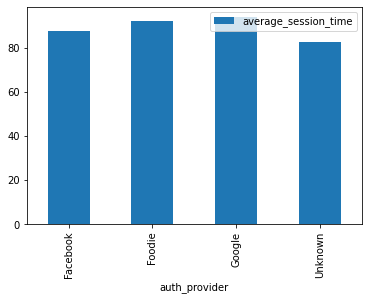

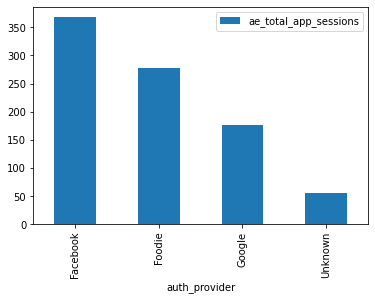

In [26]:
session_length = people_cleaned[['auth_provider', 'average_session_time']].groupby('auth_provider').mean()
num_sessions = people_cleaned[['auth_provider', 'ae_total_app_sessions']].groupby('auth_provider').mean()
session_length.plot.bar()
num_sessions.plot.bar();


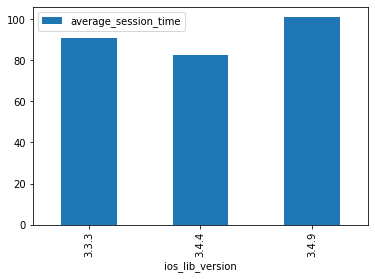

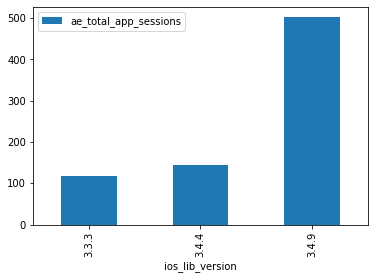

In [27]:
session_length1 = people_cleaned[['ios_lib_version', 'average_session_time']].groupby('ios_lib_version').mean()
num_sessions1 = people_cleaned[['ios_lib_version', 'ae_total_app_sessions']].groupby('ios_lib_version').mean()
session_length1.plot.bar()
num_sessions1.plot.bar();

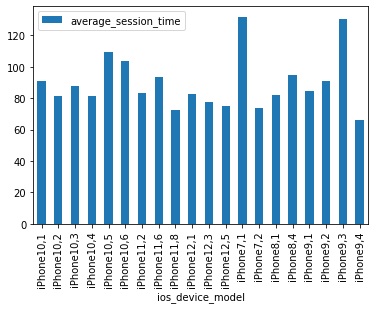

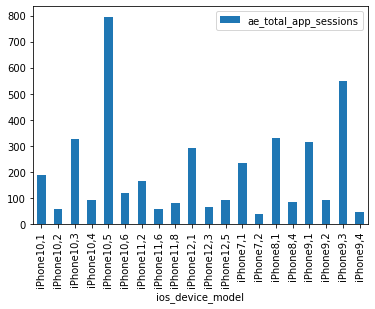

In [28]:
session_length2 = people_cleaned[['ios_device_model', 'average_session_time']].groupby('ios_device_model').mean()
num_sessions2 = people_cleaned[['ios_device_model', 'ae_total_app_sessions']].groupby('ios_device_model').mean()
session_length2.plot.bar()
num_sessions2.plot.bar();